# Exploring Shark-Human Interactions in the MENA Region: Unveiling Insights from the Global Shark Attack File
The "Global Shark Attack File" (GSAF) is one of the few large databases reporting incident logs between humans and the apex predators of the ocean. Created by a group of physicians, surgeons and medical examiners it quickly grew and caught the attention of the "Shark Research Institute" (SRI).Since 1992 the GSAF has been maintained by the SRI.As of today the GSAF keeps getting updated and provides public use of the incident logs through various forms; a downloadable incident log , a world map and an interactive website.

The incident log file can be conveniently downloaded in Excel format by following the link provided below:

https://www.sharkattackfile.net/incidentlog.htm

In this data analysis project, we aim to unearth patterns, trends, and insights that may lie hidden within the interactions between sharks and humans specifically within the MENA (Middle East and North Africa) region. We will be applying principles of data analysis such as: data manipulation, data visualization and data cleaning. By doing this, we want to help everyone understand more about how people and sharks share the same waters.

### Shaping the Dataset to Suit Our Analysis

In [18]:
# Libraries/Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# loading the excel file as a csv file
data_set = pd.read_csv("GSAF5.csv")
GSAF5 = pd.DataFrame(data_set)

# Familiarizing our self with the data set
GSAF5.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,07 Aug-2023,2023.0,Unprovoked,USA,New York,Rockaway,Wading,Tatyana Koltunyuk,F,65,...,NaN,"S.S. Curatolo- Wagemann, GSAFF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31 Jul-2023,2023.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Brandon Boncore,M,22,...,NaN,"Fox35, 7/31/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30 Jul-2023,2023.0,Unprovoked,USA,Florida,"Anna Maria Island, Manatee County",Spearfishing,male,M,22,...,NaN,"R. Babington, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29 Jul-2023,2023.0,Unprovoked,USA,Florida,Tampa Bay,Swimming,Natalie Branda,F,26,...,NaN,"Fox12, 8/1/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24 Jul-2023,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,Jack Frost,M,20s,...,Wfite shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that this data set include essential attributes such as year, location, type, country, and species.Our next step involves taking a closer look at the data.

In [3]:
GSAF5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6887 non-null   object 
 1   Year                    6885 non-null   float64
 2   Type                    6869 non-null   object 
 3   Country                 6837 non-null   object 
 4   Area                    6407 non-null   object 
 5   Location                6324 non-null   object 
 6   Activity                6304 non-null   object 
 7   Name                    6668 non-null   object 
 8   Sex                     6309 non-null   object 
 9   Age                     3906 non-null   object 
 10  Injury                  6852 non-null   object 
 11  Fatal (Y/N)             6328 non-null   object 
 12  Time                    3375 non-null   object 
 13  Species                 3780 non-null   object 
 14  Investigator or Source  6868 non-null   

The dataset contains 6912 entries,the dataset offers a robust foundation for our analysis. However, there are some columns with missing data that we need to fix. Before dealing with that, we'll start by picking out the columns that are most important for our study.

In [4]:
# List of columns to remove
columns_to_remove=['Name','Age','Sex ','Injury','Time','Investigator or Source','pdf','href formula','href','Case Number','Case Number','original order']
GSAF5 = GSAF5.drop(columns = columns_to_remove)
# Printing the result
GSAF5.head()

,Date,Year,Type,Country,Area,Location,Activity,Fatal (Y/N),Species,Case Number.1,Unnamed: 21,Unnamed: 22
0,07 Aug-2023,2023.0,Unprovoked,USA,New York,Rockaway,Wading,N,NaN,NaN,NaN,NaN
1,31 Jul-2023,2023.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,N,NaN,NaN,NaN,NaN
2,30 Jul-2023,2023.0,Unprovoked,USA,Florida,"Anna Maria Island, Manatee County",Spearfishing,N,NaN,NaN,NaN,NaN
3,29 Jul-2023,2023.0,Unprovoked,USA,Florida,Tampa Bay,Swimming,N,NaN,NaN,NaN,NaN
4,24 Jul-2023,2023.0,Unprovoked,Australia,Western Australia,Gnarabup Beach,Surfing,N,Wfite shark,NaN,NaN,NaN


After streamlining our dataset by removing unnecessary columns, we are now ready to narrow our focus even further. This involves filtering the remaining data to match our specific goals. Our approach begins by zeroing in on a specific timeframe, starting from the year 1900 and extending to the present day. Additionally, we will pinpoint countries within the MENA region to ensure our analysis remains tightly aligned with our objectives.

### Unveiling Trends: Analyzing the Evolution and Count of Shark Attacks

Having filtered the dataset to exclusively include MENA countries in the country column, we're now primed to initiate our analysis. Our exploration commences with identifying the countries within the region that have encountered the highest number of shark attacks.

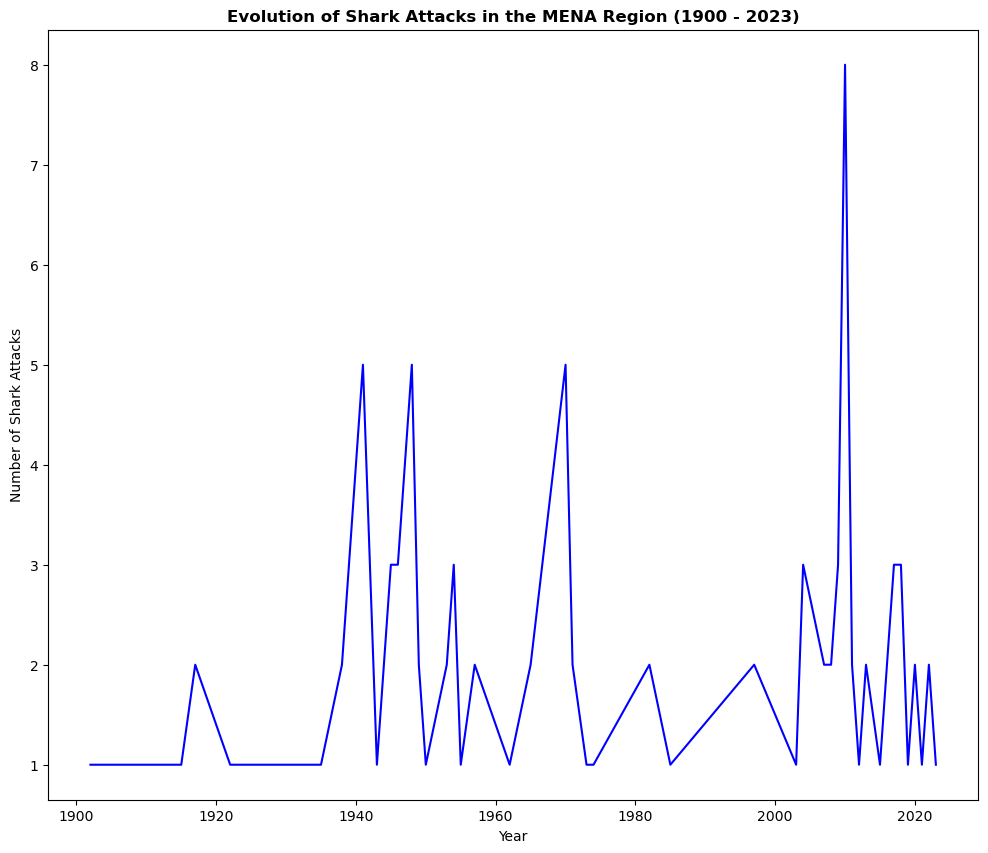

In [5]:
# Filtering the data by year (starting from 1900)
GSAF5 = GSAF5[GSAF5['Year']>=1900]

# List of countries in the MENA region
MENA = ['ALGERIA','BAHREIN','EGYPT','EGYPT/ISRAEL',
        'IRAN','IRAN/IRAQ','IRAQ','ISRAEL','KUWAIT',
        'LEBANON','LIBYA','PALESTINIAN TERRITORIES',
        'SAUDI ARABIA','SYRIA','TUNISIA','UNITED ARAB EMIRATES',
       'UNITED ARAB EMIRATES (UAE)','YEMEN']
# Filtering the data by country
GSAF5 = GSAF5[GSAF5['Country'].isin(MENA)]
GSAF5.head()

# Combining same countries with different names
GSAF5['Country'] = GSAF5['Country'].replace({"UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES"})
GSAF5['Country'] = GSAF5['Country'].replace({"EGYPT/ISRAEL": "EGYPT"})
GSAF5['Country'] = GSAF5['Country'].replace({"IRAN/IRAQ": "IRAN"})

# Remove rows with null values in the 'Country' column
GSAF5 = GSAF5.dropna(subset=['Country'])
    
# Grouping the data by year and counting the number of attacks
attacks_per_year = GSAF5.groupby('Year')['Country'].count()

# Creating a line plot to visualize the evolution of shark attacks in the MENA region
plt.figure(figsize=(12, 10))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Evolution of Shark Attacks in the MENA Region (1900 - 2023)',fontweight='bold')
plt.show()

From the line plot, it is evident that the number of shark attacks experienced a significant spike starting from the late 1930s, maintaining a relatively steady count until a drop in the 1980s. However, a subsequent resurgence occurred in the 2010s, with the number of attacks reaching a peak of 8 incidents.

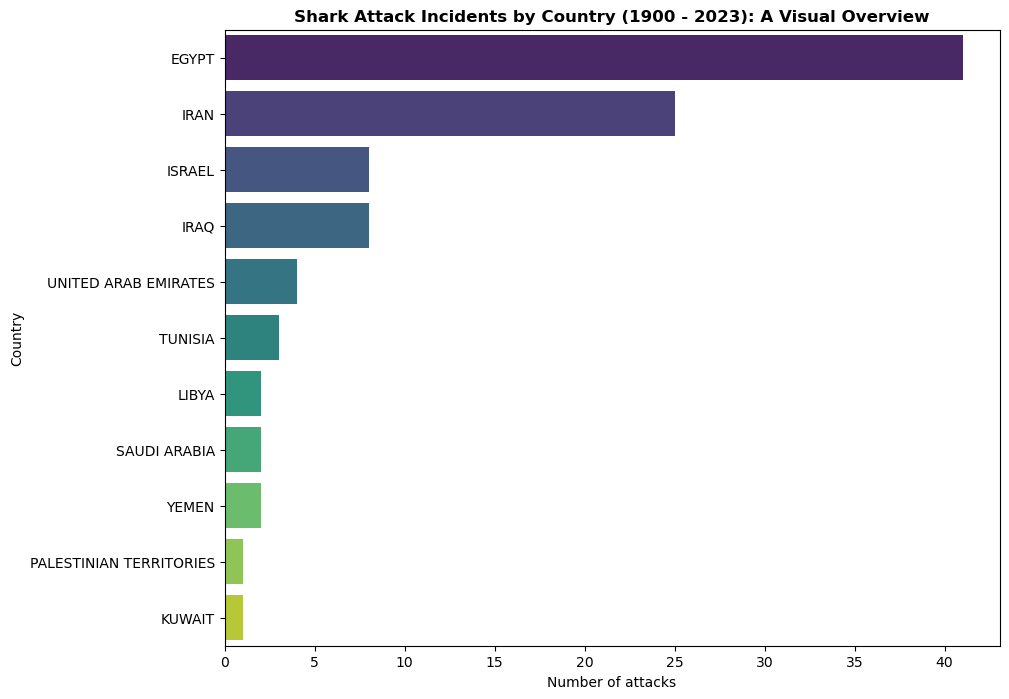

In [6]:
# Creating a count plot to visualize the number of sharks attacks
plt.figure(figsize=(10, 8))
sns.countplot(data=GSAF5, y='Country', order=GSAF5['Country'].value_counts().index, palette='viridis')
plt.xlabel('Number of attacks')
plt.ylabel('Country')
plt.title('Shark Attack Incidents by Country (1900 - 2023): A Visual Overview',fontweight='bold')
plt.show()

From the presented visualization, a clear pattern emerges, highlighting Egypt as the country with the highest number of shark attacks, exceeding 40 incidents. Following closely are Iran, Israel, Iraq, and the UAE, each contributing to a substantial number of recorded incidents.Now, as we delve deeper into our analysis, our focus expands beyond just the count of shark attacks. In addition to examining the frequency of incidents, we're about to explore an even more crucial aspect: the fatality rate associated with these attacks.

### Delving into Shark Attack Outcomes: Exploring Fatal and Non-Fatal Incidents

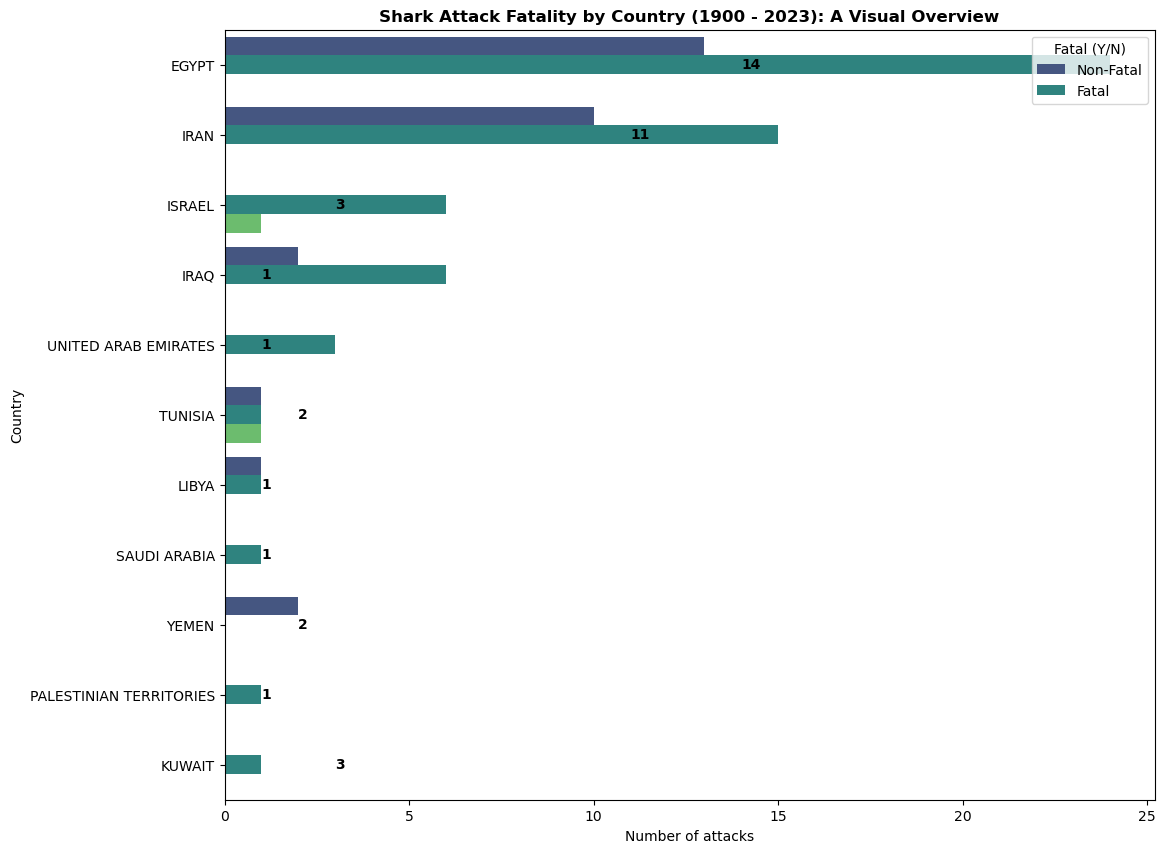

In [7]:
# Creating a count plot to visualize the number of fatal attack and non-fatal attack ratio
plt.figure(figsize=(12, 10))

# Calculate the adjusted fatality count for each country
country_fatalities = GSAF5.groupby('Country')['Fatal (Y/N)'].apply(lambda x: (x == 'Y').sum() + 1)

# Create the count plot with hue for fatal and non-fatal attacks
sns.countplot(data=GSAF5, y='Country', hue=GSAF5['Fatal (Y/N)'], order=GSAF5['Country'].value_counts().index, palette='viridis')

# Annotate the bars with the fatality counts
for index, value in enumerate(country_fatalities):
    plt.text(value, index, str(value), va='center', color='black', fontsize=10, fontweight='bold')

plt.xlabel('Number of attacks')
plt.ylabel('Country')
plt.title('Shark Attack Fatality by Country (1900 - 2023): A Visual Overview',fontweight='bold')
plt.legend(title='Fatal (Y/N)', loc='upper right', labels=['Non-Fatal', 'Fatal'])
plt.show()

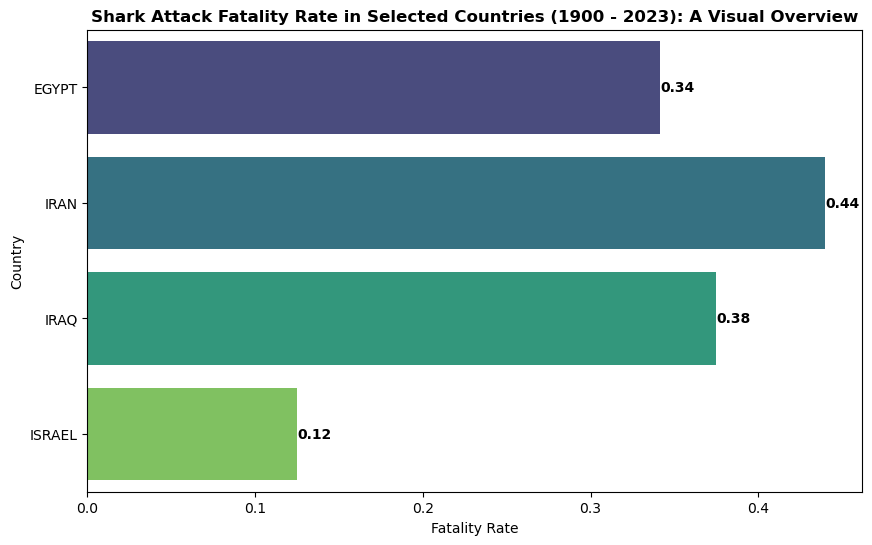

In [8]:
plt.figure(figsize=(10, 6))

# Calculate the adjusted fatality count for each country
country_fatalities = GSAF5.groupby('Country')['Fatal (Y/N)'].apply(lambda x: (x == 'Y').sum() + 1)

# Calculate the total number of attacks for each country
country_total_attacks = GSAF5['Country'].value_counts()

# Filter for specific countries
countries_to_plot = ['EGYPT', 'IRAN', 'IRAQ', 'ISRAEL']
country_fatality_rate = country_fatalities[countries_to_plot] / country_total_attacks[countries_to_plot]

# Create a bar plot for fatality rate
sns.barplot(x=country_fatality_rate, y=countries_to_plot, palette='viridis')

# Annotate the bars with the fatality rates
for index, value in enumerate(country_fatality_rate):
    plt.text(value, index, f'{value:.2f}', va='center', color='black', fontsize=10, fontweight='bold')

plt.xlabel('Fatality Rate')
plt.ylabel('Country')
plt.title('Shark Attack Fatality Rate in Selected Countries (1900 - 2023): A Visual Overview',fontweight='bold')
plt.show()

Upon analysis of both graphical representations, insights surface regarding shark-human interactions in the MENA region. The graph illustrating the count of fatal attacks underscores Egypt's prominence, leading with 14 incidents, trailed by Iran with 11, and Israel with 3 instances. However, a look at the fatality rate plot can tell us that Iran emerges as the frontrunner in terms of fatality rates, followed closely by Iraq, Egypt, and concluding with Israel. This dual perspective underscores the significance of assessing not only the frequency of occurrences but also the fatality rates.

### Exploring Shark-Human Interactions Across Maritime Regions
With our initial insights in mind, we're now changing our angle of exploration. Instead of looking at countries, we're going to focus on the maritime regions. This new approach will help us understand how shark-human interactions vary depending on the location in the water.

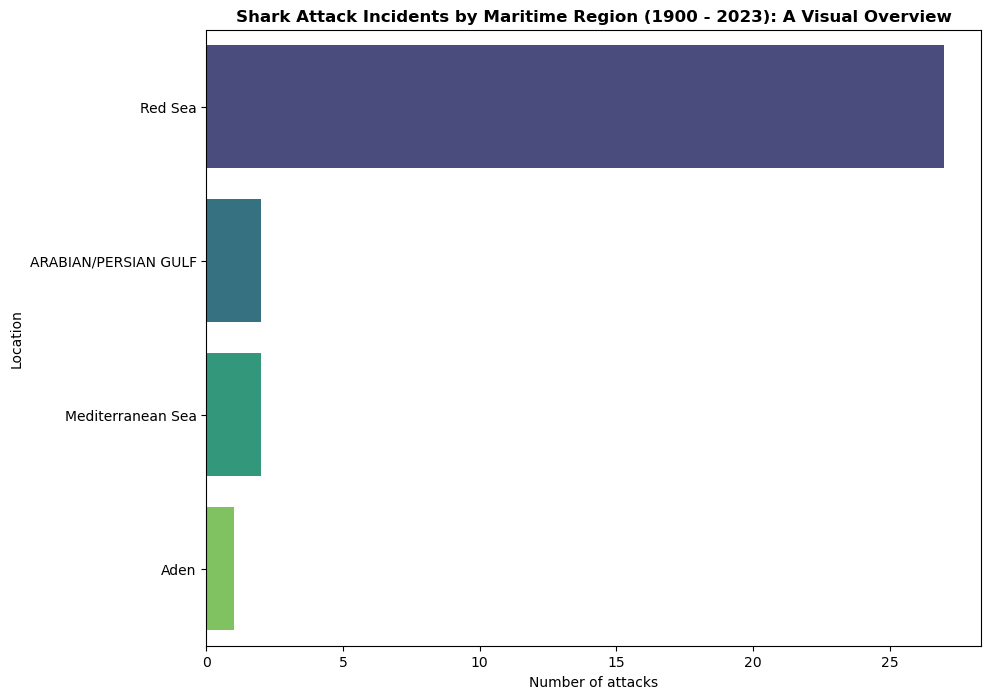

In [9]:
# list of maritime regions
maritime_regions = ['Mediterranean Sea','Hurghada, Red Sea Governorate'
                   ,'Red Sea Protectorate','Red Sea','South Sinai, Gulf of Aqaba','East of the Gulf of Aqaba'
                   ,'Enroute from Suez to Aden (Yemen)','Aden','PERSIAN GULF','Gulf of Suez','Sinai Peninsula'
                    ,'South Sinai Peninsula','St. Johns Reef','Eastern Province','Umm al Qaywayan Province']
# Filtering the data by region
GSAF5 = GSAF5[GSAF5['Area'].isin(maritime_regions)]

# Remove rows with null values in the 'Location' column
GSAF5 = GSAF5.dropna(subset=['Area'])

# Combining same regions with different names
GSAF5['Area'] = GSAF5['Area'].replace({"Hurghada, Red Sea Governorate": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"Red Sea Protectorate": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"Gulf of Suez": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"South Sinai, Gulf of Aqaba": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"East of the Gulf of Aqaba": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"South Sinai Peninsula": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"Sinai Peninsula": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"St. Johns Reef": "Red Sea"})
GSAF5['Area'] = GSAF5['Area'].replace({"Enroute from Suez to Aden (Yemen)": "Aden"})
GSAF5['Area'] = GSAF5['Area'].replace({"Eastern Province": "ARABIAN/PERSIAN GULF"})
GSAF5['Area'] = GSAF5['Area'].replace({"Umm al Qaywayan Province": "ARABIAN/PERSIAN GULF"})
GSAF5['Area'] = GSAF5['Area'].replace({"Eastern Province": "ARABIAN/PERSIAN GULF"})


# Create a count plot to visualize the number of shark attacks per region
plt.figure(figsize=(10, 8))
sns.countplot(data=GSAF5, y='Area', order=GSAF5['Area'].value_counts().index, palette='viridis')
plt.xlabel('Number of attacks')
plt.ylabel('Location')
plt.title('Shark Attack Incidents by Maritime Region (1900 - 2023): A Visual Overview',fontweight='bold')
plt.show()

Analyzing the visualization, it becomes evident that the Red Sea stands out with the highest number of shark attacks, exceeding 25 incidents. Following it, the Mediterranean Sea and the Arabian / persian gulf records 3 attacks each, while the Aden region accounts for 1 incident. Notably, our analysis will delve further into the reasons behind the high frequency of attacks in the Red Sea, seeking to uncover insights that shed light on this distinct pattern. Our analysis will now investigate the types of attacks, victim activities, and species involved in the Red Sea.

### Unveiling the Red Sea's Dominance in Shark Attacks

As we shift our focus to the Red Sea's intriguing prevalence in shark interactions, our exploration gathers momentum. We're not merely observing; we're delving into the reasons behind this pattern. Our journey now extends to investigating the types of attacks, victim activities, and the species involved. Furthermore, we're also eager to unveil the seasonal distribution of these interactions, adding another layer of understanding to the Red Sea's role in shark-human encounters.

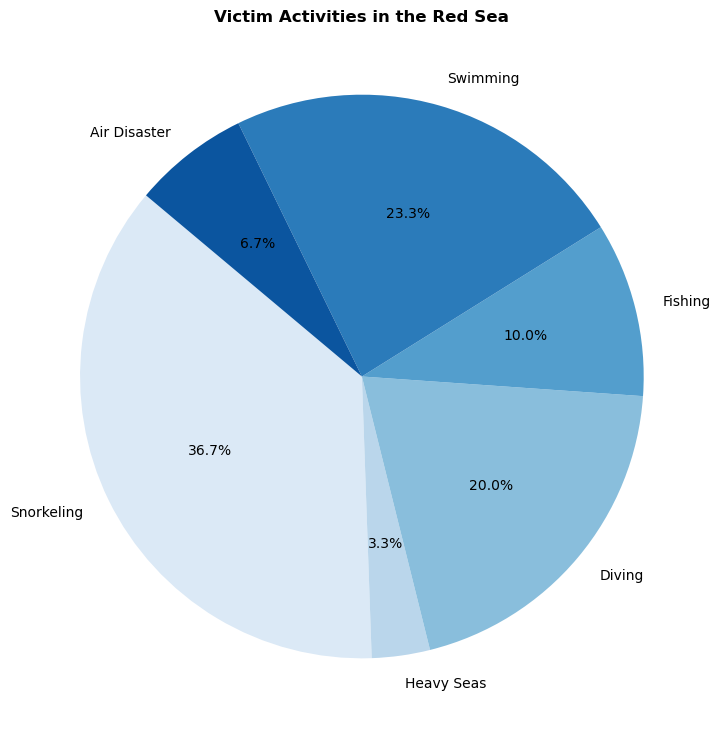

In [10]:
# list of Red Sea regions
red_sea_regions = ['Mediterranean Sea','Hurghada, Red Sea Governorate'
                   ,'Red Sea Protectorate','Red Sea','South Sinai, Gulf of Aqaba','East of the Gulf of Aqaba'
                   ,'Gulf of Suez','South Sinai Peninsula','St. Johns Reef','Sinai Peninsula']

# Filtering the data by region
RS = GSAF5[GSAF5['Area'].isin(red_sea_regions)]

# Remove rows with null values in the 'Location' column
RS = GSAF5.dropna(subset=['Area'])

# List of victim activities
victim_activities = RS['Activity'].value_counts()
# Simplifying an activity name
victim_activities = victim_activities.rename(lambda x: 'Heavy Seas' if 'heavy seas' in x.lower() else x)
victim_activities = victim_activities.rename(lambda x: 'Diving' if 'diving' in x.lower() else x)
victim_activities = victim_activities.rename(lambda x: 'Fishing' if 'fishing' in x.lower() else x)
victim_activities = victim_activities.rename(lambda x: 'Air disaster' if 'air' in x.lower() else x)
victim_activities = victim_activities.rename(lambda x: 'Swimming' if 'swimming' in x.lower() else x)

# Combine specific related activities into one category
diving_activities = ['Sponge diving', 'Diving for sponges', 'Scuba diving', 'Diving']
combined_diving_activities = victim_activities[victim_activities.index.isin(diving_activities)].sum()
fishing_activities = ['fishing','tuna fishing','Fishing']
combined_fishing_activities = victim_activities[victim_activities.index.isin(fishing_activities)].sum()
swimming_activities = ['Swimming','swimming','Swimming / treading water']
combined_swimming_activities = victim_activities[victim_activities.index.isin(swimming_activities)].sum()
air_disaster = ['Air disaster','air disaster','Air disaster. Flash Airlines Boeing 737 crashed into the Red Sea']
combined_air_disaster = victim_activities[victim_activities.index.isin(air_disaster)].sum()

# Remove individual related activities from the list
victim_activities = victim_activities.drop(diving_activities, errors='ignore')
victim_activities = victim_activities.drop(fishing_activities, errors='ignore')
victim_activities = victim_activities.drop(swimming_activities, errors='ignore')
victim_activities = victim_activities.drop(air_disaster, errors='ignore')

# Add the combined percentage for related activities
victim_activities['Diving'] = combined_diving_activities
victim_activities['Fishing'] = combined_fishing_activities
victim_activities['Swimming'] = combined_swimming_activities
victim_activities['Air Disaster'] = combined_air_disaster

# Create a pie plot
sns.set_palette("Blues")
plt.figure(figsize=(8, 9))
plt.pie(victim_activities, labels=victim_activities.index, autopct='%1.1f%%', startangle=140)
plt.title("Victim Activities in the Red Sea",fontweight='bold')
plt.axis('equal')
plt.show()

The pie chart provides valuable insights into the types of activities that have led to shark encounters in the Red Sea. Snorkeling stands out as the most common activity, accounting for approximately 37% of incidents. Followed by Swimming with 23% then Diving with 20% respectively. This information highlights the activities that tend to result in shark interactions, offering a clear perspective on where preventive measures and safety awareness efforts might be most effective.

This understanding guides us to explore the seasonal distribution of these interactions, uncovering patterns that enhance our comprehension of shark-human dynamics in the region.

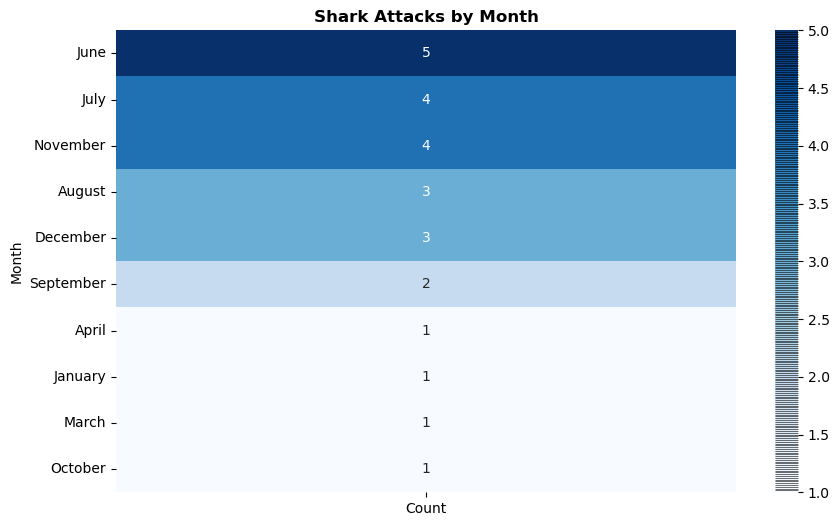

In [11]:
# Extract the 'Date' column from the filtered data
dates = RS['Date']

# Extract and convert month names
months = []
for date in dates:
    try:
        months.append(datetime.strptime(date, '%d-%b-%Y').strftime('%B'))
    except ValueError:
        try:
            months.append(datetime.strptime(date, '%d-%b %Y').strftime('%B'))
        except ValueError:
            pass

# Create dataframe for the heatmap
month_counts = {month: months.count(month) for month in set(months)}
month_df = pd.DataFrame(month_counts.items(), columns=['Month', 'Count'])
heatmap_data = month_df.pivot_table(index='Month', values='Count', aggfunc='sum')
heatmap_data = heatmap_data.sort_values(by='Count', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar_kws={'drawedges': True})
plt.title("Shark Attacks by Month", fontweight='bold')
plt.ylabel("Month")
plt.show()

The graph depicting attacks per month distinctly highlights a significant concentration during the months of June and July. This observation aligns with the Red Sea region's reputation as a renowned tourist destination, drawing visitors globally for its captivating coral reefs and upscale resorts. Notably, these months correspond to the peak of the summer vacation season, resulting in heightened human activity in the sea. This heightened presence amplifies the risk factor associated with shark attacks during this period of the year.

### Exploring Shark Species Involved
The Red Sea is renowned for its rich and diverse marine ecosystem, hosting a variety of wildlife species, including a wide range of sharks. Considering this backdrop, the question arises: which shark species are primarily responsible for the highest number of attacks?

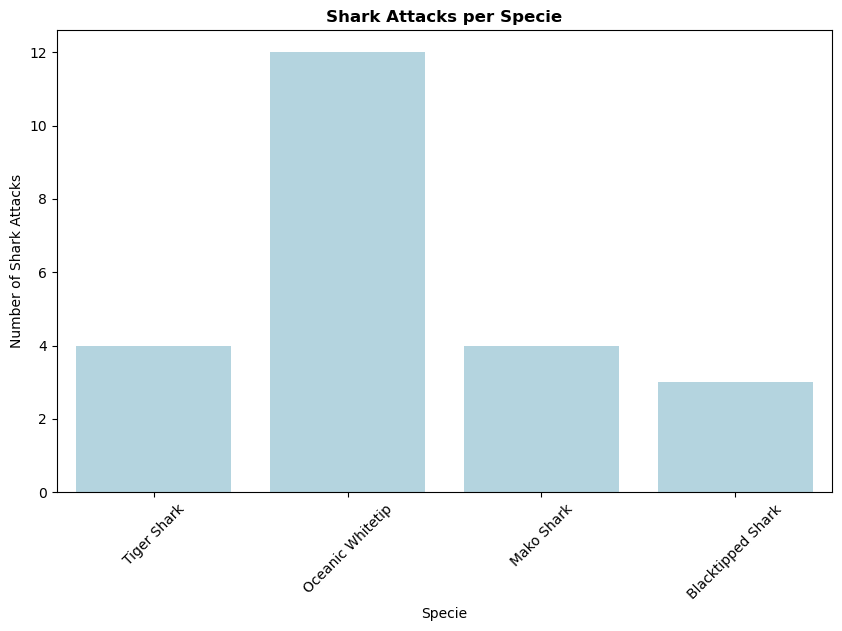

In [12]:
# Extract the 'Species' column from the filtered data
species = RS['Species ']

def clean_species_name(name):
    if isinstance(name, str):
        name = name.lower()
        if 'oceanic whitetip' in name:
            return 'Oceanic Whitetip'
        elif 'mako shark' in name:
            return 'Mako Shark'
        elif 'tiger shark' in name:
            return 'Tiger Shark'
        elif 'blacktipped shark' or 'black tipped' in name:
            return 'Blacktipped Shark'
    return name

# Apply the custom function to the species names
cleaned_species = species.apply(clean_species_name)

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=cleaned_species, color='lightblue')
plt.title("Shark Attacks per Specie",fontweight='bold')
plt.xlabel("Specie")
plt.ylabel("Number of Shark Attacks")
plt.xticks(rotation=45)
plt.show()

The graph highlights the Oceanic Whitetip shark as the dominant species with 12 recorded attacks. Following this, both the Tiger shark and Mako shark appear in equal frequency. Lastly, the Blacktipped shark is observed with a comparatively lower occurrence.

Now, our focus shifts to understanding which of these attacks were more fatal and whether they were provoked or unprovoked.

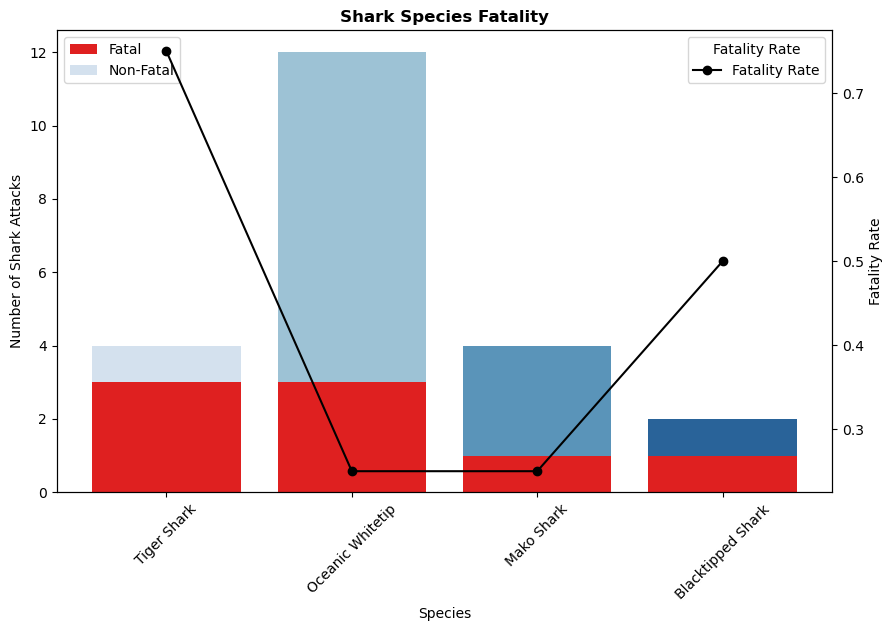

In [22]:
# Data
species = ["Tiger Shark", "Oceanic Whitetip", "Mako Shark", "Blacktipped Shark"]
fatal_counts = [3, 3, 1, 1]
non_fatal_counts = [1, 9, 3, 1]

# Calculate fatality rates
total_counts = [fatal + non_fatal for fatal, non_fatal in zip(fatal_counts, non_fatal_counts)]
fatality_rates = [fatal / total for fatal, total in zip(fatal_counts, total_counts)]

# Create DataFrame
fatality = {
    "Species": species,
    "Fatal (Y)": fatal_counts,
    "Non-Fatal (N)": non_fatal_counts,
    "Fatality Rate": fatality_rates
}
fatality_df = pd.DataFrame(fatality)

# stacked group bar plot
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
ax = sns.barplot(x="Species", y="Fatal (Y)", data=fatality_df, label="Fatal", color="red")
ax = sns.barplot(x="Species", y="Non-Fatal (N)", data=fatality_df, bottom=fatal_counts, label="Non-Fatal",palette="Blues")
ax2 = ax.twinx()
ax2.plot(fatality_df["Species"], fatality_df["Fatality Rate"], color="black", marker="o", label="Fatality Rate")
ax2.set_ylabel("Fatality Rate")
ax.set_title("Shark Species Fatality",fontweight='bold')
ax.set_xlabel("Species")
ax.set_ylabel("Number of Shark Attacks")
ax.set_xticklabels(species, rotation=45)
ax.legend(loc="upper left")
ax2.legend(loc="upper right", title="Fatality Rate")
plt.show()

The visualization highlights distinct patterns among the shark species. Despite the Oceanic Whitetip accounting for the highest attack count of 12, merely 3 resulted in fatalities, yielding a fatality rate of approximately 0.2. Comparatively, the Tiger Shark, with 3 out of 4 attacks ending fatally, exhibits a significantly higher fatality rate of roughly 0.7. Both the Mako Shark and the Oceanic Whitetip share a comparable fatality rate. The Blacktipped Shark, on the other hand, presents a fatality rate of 0.5. This is influenced by its lower attack count of 2, where one incident was fatal.

### Provoked vs Unprovoked

While the visualization provides valuable insights into the behavior of these apex predators, to gain a comprehensive understanding, we will now delve into the underlying reasons behind these attacks, specifically categorizing them as provoked and unprovoked incidents. This additional analysis will shed light on the driving factors behind these interactions and contribute to a more holistic comprehension of these species' behavior.

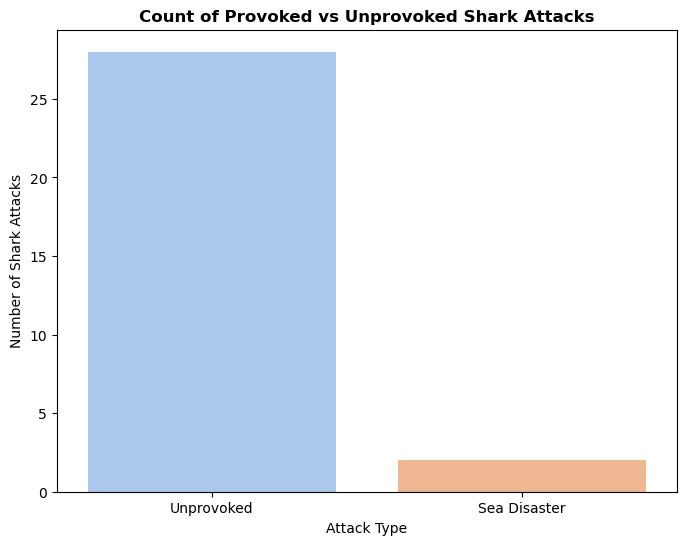

In [568]:
# Filtering invalid data
TYPE = RS[RS['Type'] != 'Invalid']
Filtered_Type = TYPE['Type']

# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=Filtered_Type, palette='pastel')
plt.title("Count of Provoked vs Unprovoked Shark Attacks", fontweight='bold')
plt.xlabel("Attack Type")
plt.ylabel("Number of Shark Attacks")
plt.xticks(rotation=0)
plt.show()

An unexpected result is evident from the graph, showing zero provoked attacks. Does this imply that sharks are inherently aggressive? Not necessarily. In reality, the majority of shark attacks are unprovoked. However, this does not stem from sharks viewing humans as prey. Instead, it is often attributed to factors such as mistaken identity, territorial behavior, hunger, and curiosity.

## Key Findings: Shark-Human Interactions in the MENA Region

Closing the data analysis study on shark-human interactions in the Middle East and North African region, we can deduce several significant findings. Temporal analysis revealed fluctuations in attack frequency over time, with a notable resurgence in recent years. Egypt emerged as the epicenter of attacks, followed by Iran, Israel, Iraq, and the UAE, emphasizing areas for heightened awareness. Moreover, the Red Sea region stood out as the hotspot for incidents, particularly during peak tourist months. Understanding victim activities highlighted snorkeling, swimming, and diving as prominent triggers. Species involvement showcased varying fatality rates, with insights into the nuanced nature of interactions. Notably, unprovoked attacks overwhelmingly surpassed provoked ones, dispelling notions of inherent aggression and underscoring factors like curiosity and misidentification. Collectively, these findings inform strategies for coexistence and underscore the importance of holistic analysis in deciphering shark-human dynamics.

In the year 2022, a total of 62 shark attacks were confirmed worldwide, with 5 of them resulting in fatalities. However, the illegal mass fishing of sharks for their fins continues to persist. This practice of indiscriminate shark killing has detrimental consequences as it disrupts the delicate balance of ecosystems. Sharks occupy a crucial role in the food chain, actively controlling the populations of other species. In their absence, these populations can multiply unchecked, exerting adverse effects on the environment. Notably, an overabundance of jellyfish can obstruct shipping lanes and ensnare fishing equipment.
Sharks, as apex predators, hold a pivotal position in the hierarchy of the food chain, devoid of natural predators themselves. This status ensures the self-regulation of their populations. The unfortunate loss of shark lives can trigger population declines, setting off a chain reaction of ecological repercussions.

###### The International Fund for Animal Welfare (IFAW) states commercial fishing kills over 100 million sharks annually. 

Copyright © 2023 by Ramzy Bakir